In [19]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import pandas as pd
data3 = pd.read_csv('/content/drive/MyDrive/regression_project/Cab_data/Cab_price_clean.csv')
cab_price = data3.copy()

In [ ]:
cab_price.head()

,index,distance_km,company,drop_location,pickup_location,price,surge,ride_type,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,mounth,weekday,weekend
0,0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.46,0.29,1022.25,0.0000,0.76,7.68,9,16,12,6,1
1,1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.31,1.00,1003.17,0.1123,0.90,13.69,2,27,11,1,0
2,2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,44.31,1.00,1003.17,0.0000,0.90,13.69,1,28,11,2,0
3,3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.08,0.00,1013.71,0.0000,0.70,5.25,4,30,11,4,0
4,4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.58,0.42,998.64,0.0000,0.71,11.30,3,29,11,3,0


In [20]:
cat_col = cab_price.select_dtypes(include=['object'])
cat_col

""
0
1
2
3
4
...
637971
637972
637973
637974


In [21]:
cab_price = data3.copy()

le = LabelEncoder()
c_cols = ['company','ride_type']

for col in c_cols:
    cab_price[col] = le.fit_transform(cab_price[col])

cab_price = pd.get_dummies(data=cab_price,
                           columns=['pickup_location','drop_location'],
                           drop_first=True).astype(int)

In [ ]:
cab_price['pickup_location_South Station']

,pickup_location_South Station
0,0
1,0
2,0
3,0
4,0
...,...
637971,0
637972,0
637973,0
637974,0


In [ ]:
X = cab_price.drop(columns=['price'])
y = cab_price['price']

X_train,X_test,y_train,y_test = \
               train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(510380, 38)

In [ ]:
X_test.shape

(127596, 38)

In [22]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42
)

model = model.fit(X_train,y_train)

In [23]:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_rf_test = r2_score(y_test, y_pred)
print("r2_rf_test:",r2_rf_test)

MAE : 1.3301454850980345
RMSE: 2.2590020039657364
r2_rf_test: 0.9411235462168637


In [ ]:
y_train_pred = model.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2_rf_train = r2_score(y_train, y_train_pred)
print("r2_rf_train:",r2_rf_train)


MAE : 1.2447526963761035
RMSE: 2.084895473562245
r2_rf_train: 0.9496842898219393


In [ ]:
diff_train_test_rf = (r2_rf_train)-(r2_rf_test)
diff_train_test_rf

0.008560743605075638

In [ ]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb = xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_xgb_test = r2_score(y_test, y_pred)
print("r2_xgb_test:",r2_xgb_test)


MAE : 1.3452397584915161
RMSE: 2.256904181748907
r2_xgb_test: 0.9412328600883484


In [ ]:
y_pred = xgb.predict(X_train)

print("MAE:",mean_absolute_error(y_train, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred)))
r2_xgb_train = r2_score(y_train, y_pred)
print("r2_xgb_train:",r2_xgb_train)



MAE: 1.3443338871002197
RMSE: 2.256827802985935
r2_xgb_train: 0.941043496131897


In [ ]:
diif_train_test_xgb = (r2_xgb_train)-(r2_xgb_test)
diif_train_test_xgb

-0.00018936395645141602

In [ ]:
y_train_pred = xgb.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2  :", r2_score(y_train, y_train_pred))


MAE : 1.3443338871002197
RMSE: 2.256827802985935
R2  : 0.941043496131897


In [ ]:
cv_scores_xgb = cross_val_score(xgb,
                                X_train,
                                y_train,
                                cv=3,
                                scoring='r2',
                                n_jobs=-1)
print(f"CV SCORES-XGB : { cv_scores_xgb}")
print("---------------------")
print(f"CV Mean R2: {np.mean(cv_scores_xgb):.3f} "
      f"CV STD MEAN: {np.std(cv_scores_xgb):.3f}")


CV SCORES-XGB : [0.94166678 0.93934882 0.93962932]
---------------------
CV Mean R2: 0.940 CV STD MEAN: 0.001


In [ ]:
cv_scores_rf = cross_val_score(model,
                               X_train,
                               y_train,
                               cv=3,
                               scoring='r2'
                               )
print(f"CV SCORES-RF : {cv_scores_rf}")
print("---------------------")
print(f"CV Mean R2: {np.mean(cv_scores_rf):.3f} "
      f"CV STD MEAN: {np.std(cv_scores_rf):.3f}")


CV SCORES-RF : [0.94091091 0.93913098 0.93926301]
---------------------
CV Mean R2: 0.940 CV STD MEAN: 0.001


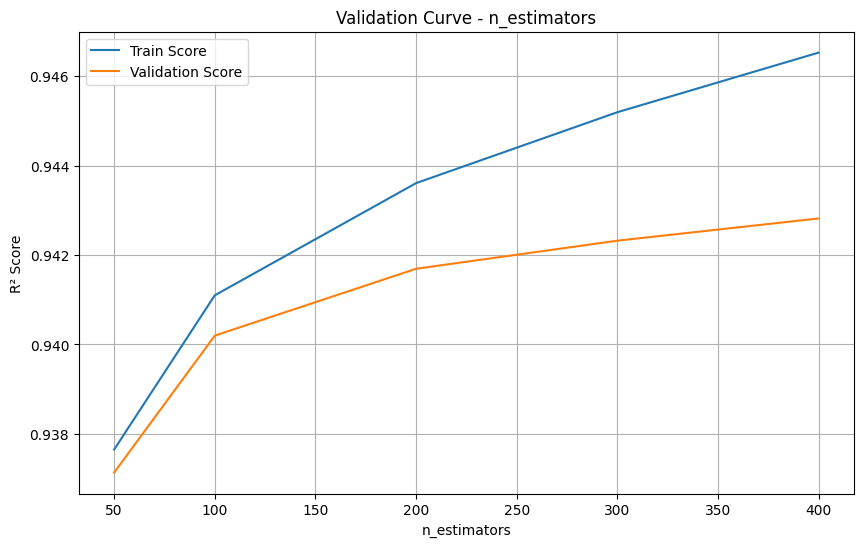

In [ ]:
param_range = [50, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    estimator=XGBRegressor(
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    X=X_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean, label="Train Score")
plt.plot(param_range, test_mean, label="Validation Score")
plt.title("Validation Curve - n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
param_range = [50, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    estimator=RandomForestRegressor(
        max_depth=15,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    ),
    X=X_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean, label="Train Score")
plt.plot(param_range, test_mean, label="Validation Score")
plt.title("Validation Curve - n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


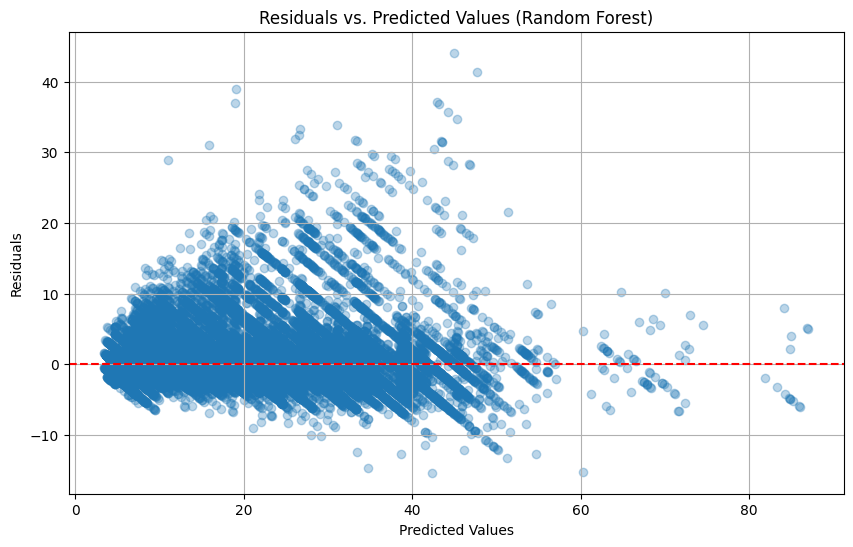

In [ ]:
rf_residuals = y_test - model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_test), rf_residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.show()


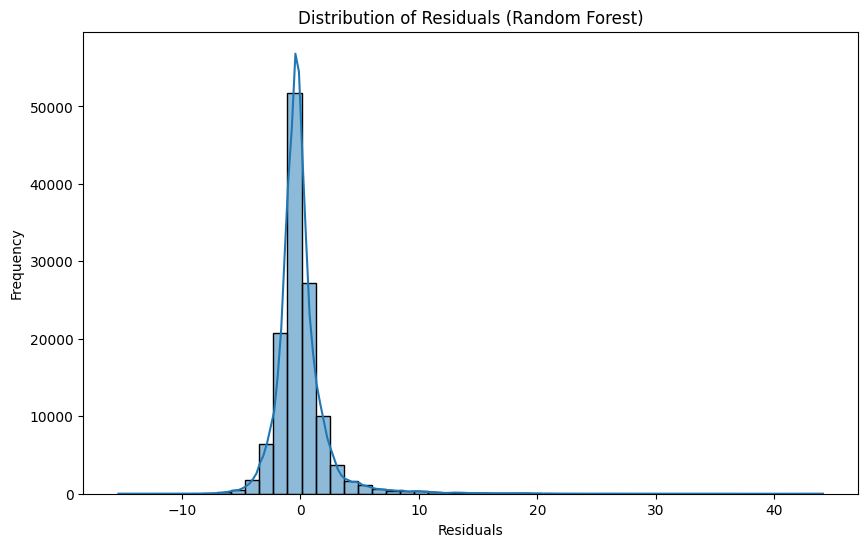

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')
plt.show()


In [33]:
rf = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}



rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    cv = 3,
    scoring = 'r2',
    verbose=2,
    n_jobs=1,
    n_iter=10,
    random_state=42
)

rf_random_search.fit(X_train, y_train)


print("Best parameters:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 4.4min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 4.4min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 4.4min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  26.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estim

In [34]:
best_rf = rf_random_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

r2_best_test_rf = r2_score(y_test, y_pred_rf)
print("r2_best_test_rf:",r2_best_test_rf)
print("mae_best_test_rf:",mean_absolute_error(y_test, y_pred_rf))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_rf)))


r2_best_test_rf: 0.9295112384551182
mae_best_test_rf: 1.537812157120913
RMSE: 2.4717567815618695


In [35]:
y_pred_train_rf = best_rf.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_pred_train_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))

r2_best_train_rf = r2_score(y_train,y_pred_train_rf)
print("r2_best_train_rf : ", r2_best_train_rf)


MAE : 0.5718407918283109
RMSE: 0.9212721980224041
r2_best_train_rf :  0.9901754885172636


In [36]:
diff_train_test_rf = r2_best_train_rf-r2_best_test_rf
diff_train_test_rf

0.060664250062145375

In [ ]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
  )

xgb_random_search.fit(X_train, y_train)

print("Best Parameters:", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score: 0.9480324586232504


In [24]:
xgb_best = XGBRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42,
    reg_lambda=5,
    n_jobs=-1,
    reg_alpha=0.5,
    gamma=5
)

xgb_best = xgb_best.fit(X_train, y_train)

In [25]:
y_pred_train = xgb_best.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

r2_best_train = r2_score(y_train,y_pred_train)
print("r2_best_train : ", r2_best_train)

MAE : 1.2284188270568848
RMSE: 2.023281371231305
r2_best_train :  0.9526142477989197


In [26]:
y_pred = xgb_best.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_best_test = r2_score(y_test, y_pred)
print("r2_best_test  :", r2_best_test)

MAE : 1.296358346939087
RMSE: 2.159787137881192
r2_best_test  : 0.9461816549301147


In [27]:
diff_train_test_best = r2_best_train-r2_best_test
diff_train_test_best

0.006432592868804932

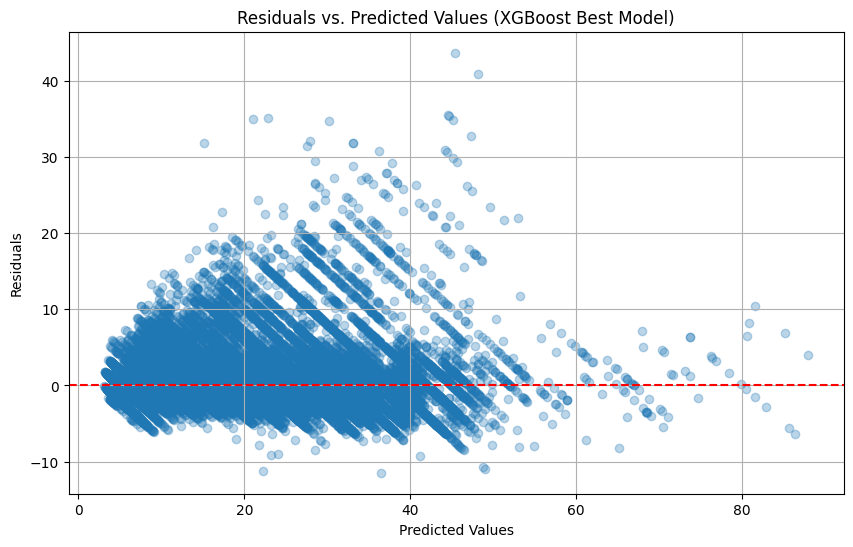

In [28]:
residuals = y_test - xgb_best.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(xgb_best.predict(X_test), residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (XGBoost Best Model)')
plt.grid(True)
plt.show()

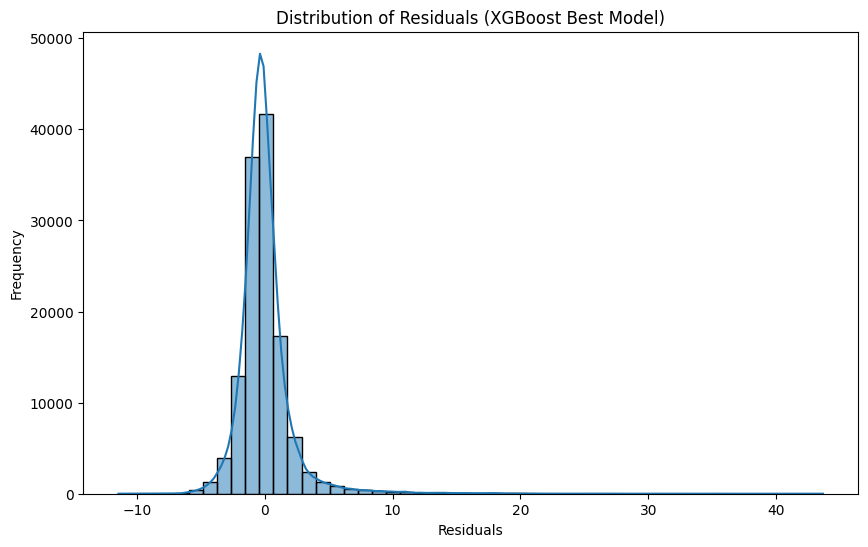

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (XGBoost Best Model)')
plt.show()

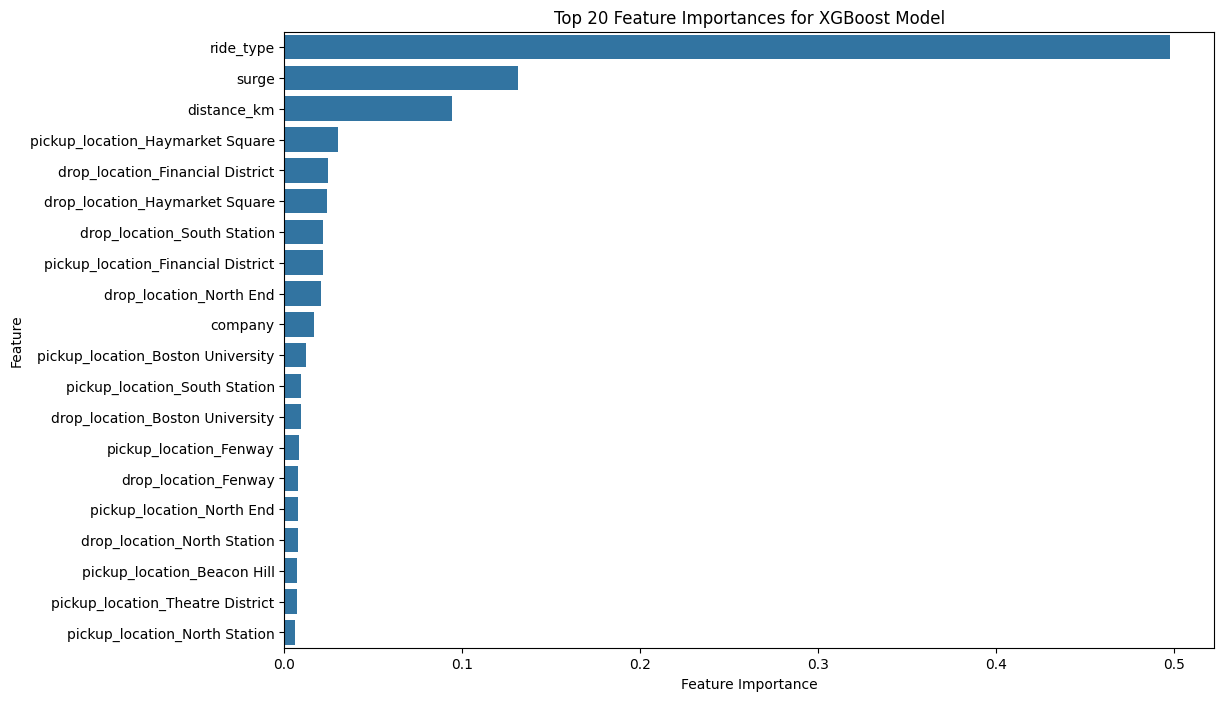

In [30]:
feature_importances = xgb_best.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances for XGBoost Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

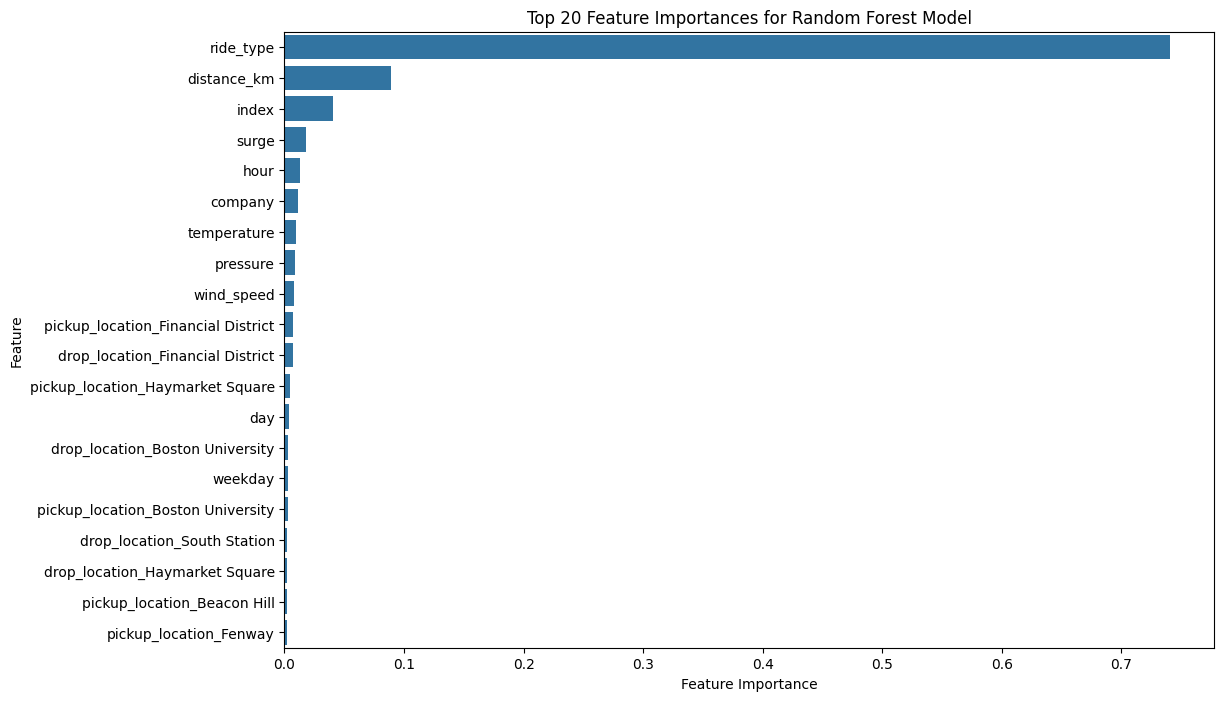

In [37]:
rf_feature_importances = best_rf.feature_importances_

rf_features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(20))
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
import joblib
joblib.dump(xgb_best, "xgb_best_model.joblib")


['xgb_best_model.joblib']

In [39]:
from google.colab import files
files.download("xgb_best_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>